#  Anomalous activities by small and mid-size enterprises

Small and Mid-size Enterprises (SME).

For the SMEs operating in the same industry segment:
 * Total asset and operating profits are expected to be correlated.
 * If a firm generated too much profit with a limited amount of assets, there may be some illegal activities contributing to the profits
 * If a firm generated too little profit with an abundant amount of assets, the operating profits may be disguised for tax purposes

 ## Imports

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Question 1**: import *k*-means and isolation forest learners from sklearn.

In [97]:
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans

## Load data

**Question 2**: load `week06_tutorial_data.csv` and print the first 5 rows.

In [98]:
firm_data = pd.read_csv("Week08_data.csv")
firm_data.head(5)

,Total Assets,Operating Profits
0,1686.275119,1070.262036
1,8208.664875,1118.977096
2,11041.828780,961.875285
3,-3613.136390,9042.081321
4,760.941151,479.629689


**Question 3**: Store the values in a numpy array called `X`.

In [99]:
X = firm_data.values
type(X)

numpy.ndarray

**Question 4**: How many points/datum and features are there in `X`?

In [100]:
X.shape

(140, 2)

## Model

### Isolation forest

**Question 5**: Instantiate an isolation forest with 10,000 estimators. Call it `iso_model`.

In [101]:
iso_model = IsolationForest(n_estimators=10000, max_samples = 'auto',
                            contamination=0.07142, max_features=1.0, 
                            bootstrap=False, n_jobs=-1, random_state=42, 
                            verbose=0,warm_start = False)


**Question 6**: What is an *estimator*?

*Answer: number of times to run the model and avarage the value*

**Question 7**: Fit the model.

In [102]:
iso_model.fit(X)



IsolationForest(contamination=0.07142, n_estimators=10000, n_jobs=-1,
                random_state=42)

**Question 8**: Predict anomalies.

In [103]:
iso_pred  = iso_model.predict(X)
print(X[iso_pred ==-1])

[[-3613.13639     9042.081321  ]
 [21080.5679        73.89734466]
 [13998.23389     1979.122167  ]
 [-1749.92279     7029.013569  ]
 [18318.75342     1639.062971  ]
 [20295.34954       83.69841288]
 [-3366.153133    -105.5456532 ]
 [22565.88102       83.64983378]
 [-2573.395943     -57.56049155]
 [21927.03203       48.6362547 ]]


**Question 9**: How do we recognize the anomalies (and the non-anomalies)?

In [104]:
np.unique(iso_pred)

array([-1,  1])

In [105]:
iso_anomolies = X[iso_pred == -1]
iso_inline = X[iso_pred == 1]

**Question 10**: Remember slide 11: *Classify: classify points above a set threshold as anomalies*?

**Question 11**: Did we set a threshold. If not, how is it set?

*Answer: ...*



### *K*-means

**Question 12**: Instantiate and fit *k*-means model. Call it `kmeans_model`.

**Question 13**: What should *k* be?

*Answer: ...*

In [113]:
kmeans_model = KMeans(n_clusters=1, random_state=42)
kmeans_model.fit(X)


KMeans(n_clusters=1, random_state=42)

**Question 14**: How can we use the fitted model for anomaly detection?

In [136]:
centroid = kmeans_model.cluster_centers_
# distance from cluster to each point 
distance = np.sqrt(((X - centroid)**2).sum(axis=1))
distance

array([ 6673.67327117,   162.91137983,  2683.63107974, 14390.69001148,
        7621.01393919,  1501.32481882,   339.72906746,  6742.63356264,
        7577.06036797,  1825.95709914,  3000.94586511,   997.56001709,
       12758.67867859,  3240.29542005,  2808.29756676,  8261.91719344,
        1515.10675865,  4683.3520671 ,  1353.6723983 ,  7235.17982419,
        7774.70651114,  9015.7429518 ,  2117.74553131,   597.32377171,
        9045.15285511,  1100.25803229,   171.94328853,  6664.5530578 ,
        3116.90058984,  2901.16049086,   808.67288149,  6709.77736488,
        1752.43690477,   995.47376807,  4767.36129381,   402.03555475,
        3543.84882015,   747.07209135,  7489.76248846,  2374.00422039,
         799.40770258,  3361.4979714 ,  2676.86470712,  5389.86535421,
        6926.81471071,  3619.69402015,   199.91852814,  1321.3130746 ,
        2354.36108343,  1684.86702486,  4778.5483543 ,   774.63659445,
         505.09753605,  1032.25854956,  4911.4635711 ,   911.82631821,
      

9045.152855108287

**Question 15**: Do we need to set a threshold? If yes, then how?

*Answer: ...*

In [ ]:
index = np.argsort(distance)
distance[index[-14:][0]]
kmeans_anomolies = X[index[-14:]]

In [151]:
distances = kmeans_model.transform(X)
distances

array([[ 6673.67327117],
       [  162.91137983],
       [ 2683.63107974],
       [14390.69001148],
       [ 7621.01393919],
       [ 1501.32481882],
       [  339.72906746],
       [ 6742.63356264],
       [ 7577.06036797],
       [ 1825.95709914],
       [ 3000.94586511],
       [  997.56001709],
       [12758.67867859],
       [ 3240.29542005],
       [ 2808.29756676],
       [ 8261.91719344],
       [ 1515.10675865],
       [ 4683.3520671 ],
       [ 1353.6723983 ],
       [ 7235.17982419],
       [ 7774.70651114],
       [ 9015.7429518 ],
       [ 2117.74553131],
       [  597.32377171],
       [ 9045.15285511],
       [ 1100.25803229],
       [  171.94328853],
       [ 6664.5530578 ],
       [ 3116.90058984],
       [ 2901.16049086],
       [  808.67288149],
       [ 6709.77736488],
       [ 1752.43690477],
       [  995.47376807],
       [ 4767.36129381],
       [  402.03555475],
       [ 3543.84882015],
       [  747.07209135],
       [ 7489.76248846],
       [ 2374.00422039],


## Plot

### Isolation forest

Text(0, 0.5, 'Operating Profits')

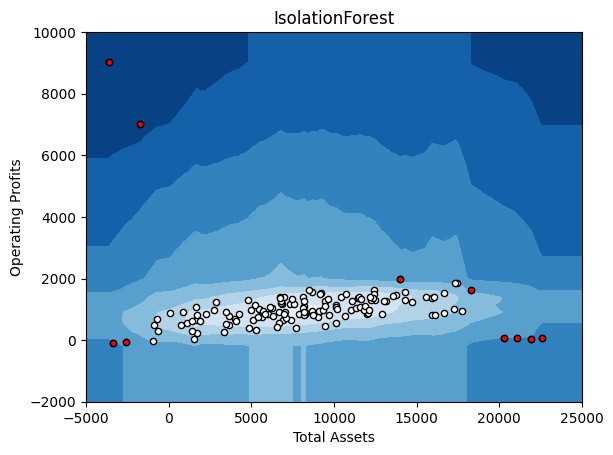

In [106]:
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5000, 25000, 500), np.linspace(-2000, 10000, 100))
Z = iso_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

plt.scatter(X[:, 0], X[:, 1], c='white', s=20, edgecolor='k',label='data')
plt.scatter(iso_anomolies[:, 0], iso_anomolies[:, 1], c='red', ec='k', s=20, label='anomaly')
plt.axis('tight')
plt.xlim((-5000, 25000))
plt.ylim((-2000, 10000))
plt.xlabel('Total Assets')
plt.ylabel('Operating Profits')

## *K*-means

SyntaxError: keyword argument repeated: kmeans_anomolies (3222164630.py, line 14)

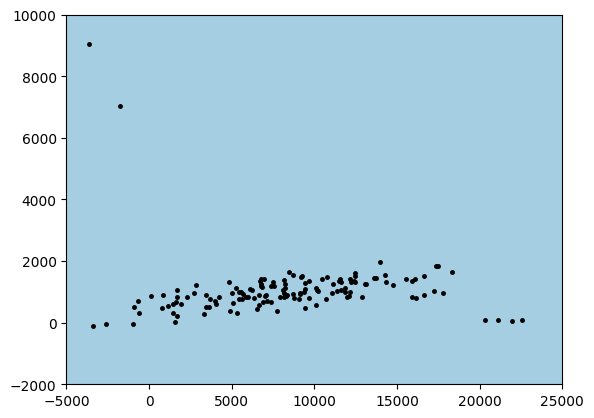

In [153]:
xx, yy = np.meshgrid(np.linspace(-5000, 25000, 500), np.linspace(-2000, 10000, 100))
Z = kmeans_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest", extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

centroids = kmeans_model.cluster_centers_

plt.plot(X[:, 0], X[:, 1], "k.", markersize=5)
plt.scatter(kmeans_anomolies = X[index[-14:]][:, 0], kmeans_anomolies = X[index[-14:]][:, 1], marker='o', c='red', ec='r', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3, color="w", zorder=10)
plt.xlabel('Total Assets')
plt.ylabel('Operating Profits')
plt.title("K-means")